In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt 

# Etapa 1

O presente trabalho prático tem como objetivo estudar relações entre diferentes atributos relacionados com pacientes com histórico de adenocarcinoma pulmonar, comumente conhecido como cancro do pulmão e estabelecer ligações entre esses atributos e a taxa de mutações de diferentes genes. Assim, pretende-se compreender quais os genes que têm influência no comportamento do cancro pulmonar. 
Para tal, recorreu-se a um dataset que continha vários atributos dos quais apenas foram selecionados alguns que se consideraram mais relevantes a nível biológico. Assim sendo, selecionaram-se os atributos diagnosis age, fraction genome altered, longest dimension, mutation count, overall survival, sex and patient’s vital status. Depois de selecionados os atributos a estudar, nos que possuíam valores em falta, foram substituídos pela média respetiva.

# Dados

In [2]:
# importar os dados
data_luad = pd.read_csv("data_RNA_Seq_v2_expression_median.txt",sep="\t",index_col=1)

In [3]:
# verificar o tamanho dos dados
data_luad.shape

(20531, 518)

In [4]:
# ver as primeiras 5 linhas
data_luad.head()

,Hugo_Symbol,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,TCGA-05-4396-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100130426,LOC100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
100133144,UBE2Q2P3,10.0113,7.1957,7.2453,11.3311,3.2254,4.0000,7.1084,3.4360,13.5406,...,11.7148,3.6657,2.3298,16.3214,20.3514,15.5193,8.4195,42.9857,14.0861,20.5338
100134869,UBE2Q2P3,11.2820,12.4436,6.0184,7.5740,3.4942,13.7852,7.5810,12.1335,16.0273,...,11.9573,9.7617,8.3410,7.5330,17.2393,22.9872,10.3226,81.1128,24.1914,8.9500
10357,LOC149767,49.5994,90.5117,49.5366,82.8303,72.5351,66.3658,109.1809,57.0596,108.4155,...,163.5739,130.7486,101.7403,82.4231,100.4196,100.1867,74.7210,85.3715,61.1388,76.9265
10431,TIMM23,848.9397,924.0158,1140.6781,807.1729,562.0037,1342.6174,1148.3315,955.9141,844.5792,...,919.1686,403.4911,918.9533,995.6058,536.7602,873.9790,766.7448,677.7333,1137.3206,565.4335


In [5]:
# verificar a existência de valores nulos
data_luad.iloc[:,0].isnull().sum() # HUGO - valores nulos

2

In [6]:
# remover as linhas com valores NaN
data_hugo_luad = data_luad[data_luad.notna()['Hugo_Symbol']] 

# coluna inicial toma valor de hugo(redundante ao entrez_gene_id)
data_hugo_luad = data_hugo_luad.set_index("Hugo_Symbol")

In [7]:
data_hugo_luad.shape  

# verificando o novo tamanho do dataset, verifica-se que apenas se removeu uma linha

(20529, 517)

In [8]:
data_hugo_luad.transpose().describe()

Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,LOC149767,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,...,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.0,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.019793,12.563599,13.772414,109.191745,921.412556,0.000518,200.965270,0.456712,0.144994,0.0,...,48.018296,383.145637,1082.626088,61.012445,849.987180,4049.562512,1080.205735,710.462033,127.999331,0.176634
std,0.110964,10.824164,11.507095,54.083375,362.542965,0.011769,156.827547,0.605640,1.625181,0.0,...,21.424549,169.977557,339.329517,74.516301,259.159593,1869.604727,440.005370,319.317913,251.016470,0.896453
min,0.000000,0.000000,0.000000,36.357000,270.115400,0.000000,11.022000,0.000000,0.000000,0.0,...,8.879000,34.099400,311.314600,0.000000,264.413200,446.043200,183.841200,219.603600,0.685400,0.000000
25%,0.000000,5.357900,5.888000,78.785300,671.334600,0.000000,89.459200,0.000000,0.000000,0.0,...,34.482800,276.152700,851.610700,5.879200,675.758400,2650.125500,776.395500,548.513500,10.759700,0.000000
50%,0.000000,10.456700,11.282000,97.173100,848.939700,0.000000,160.488400,0.305600,0.000000,0.0,...,44.308600,346.751700,1040.429600,37.424400,815.834800,3811.870500,1033.582100,663.253200,25.665900,0.000000
75%,0.000000,16.079700,17.981600,122.073800,1072.048400,0.000000,269.594000,0.746300,0.000000,0.0,...,58.514100,463.612700,1257.618600,86.475300,978.162000,5176.296700,1339.449500,807.746300,128.659200,0.000000
max,1.328100,84.739200,107.370500,677.255900,2678.614800,0.267600,1477.014100,5.281000,33.737500,0.0,...,217.434200,1749.691600,3016.414100,472.129300,2453.159500,15291.709300,2811.271300,4961.792200,2692.689000,13.407300


# MetaDados

In [9]:
# importar os metadados
meta_luad = pd.read_csv("luad_tcga_clinical_data.tsv",sep="\t",header=0,index_col=2)
# eliminar o study ID porque é redundante
del meta_luad["Study ID"]

In [10]:
# verificar o tamanho dos metadados
meta_luad.shape  

(517, 106)

In [11]:
# verificar as primeiras 5 linhas
meta_luad.head()

,Patient ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage,American Joint Committee on Cancer Metastasis Stage Code,American Joint Committee on Cancer Lymph Node Stage Code,American Joint Committee on Cancer Lymph Node Stage Code.1,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,American Joint Committee on Cancer Publication Version Type,...,Adjuvant Postoperative Targeted Therapy Administered Indicator,Time between clamping and freezing,Time between excision and freezing,Tissue Source Site,Patient Smoking History Category,Primary Therapy Outcome Success Type,Tumor Site,Person Neoplasm Status,Vial number,Patient's Vital Status
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,TCGA-05-4244,70.0,NaN,NaN,M1,NaN,NaN,N2,Stage IV,6th,...,NaN,NaN,NaN,5,4.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4249-01,TCGA-05-4249,67.0,NaN,NaN,M0,NaN,NaN,N0,Stage IB,6th,...,NaN,NaN,NaN,5,3.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4250-01,TCGA-05-4250,79.0,NaN,NaN,M0,NaN,NaN,N1,Stage IIIA,6th,...,NaN,NaN,NaN,5,4.0,NaN,Lung,NaN,A,Dead
TCGA-05-4382-01,TCGA-05-4382,68.0,NaN,NaN,M0,NaN,NaN,N0,Stage IB,6th,...,NaN,NaN,NaN,5,4.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4384-01,TCGA-05-4384,66.0,NaN,NaN,M0,NaN,NaN,N2,Stage IIIA,6th,...,NaN,NaN,NaN,5,3.0,NaN,Lung,NaN,A,Alive


In [12]:
# fazer uma análise aos metadados para melhor compreensão
meta_luad.describe(include = "all")

,Patient ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage,American Joint Committee on Cancer Metastasis Stage Code,American Joint Committee on Cancer Lymph Node Stage Code,American Joint Committee on Cancer Lymph Node Stage Code.1,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,American Joint Committee on Cancer Publication Version Type,...,Adjuvant Postoperative Targeted Therapy Administered Indicator,Time between clamping and freezing,Time between excision and freezing,Tissue Source Site,Patient Smoking History Category,Primary Therapy Outcome Success Type,Tumor Site,Person Neoplasm Status,Vial number,Patient's Vital Status
count,517,498.000000,0.0,0.0,513,0.0,0.0,516,509,494,...,154,0.0,0.0,517,503.000000,149,517,419,515,517
unique,515,NaN,NaN,NaN,5,NaN,NaN,5,9,5,...,2,NaN,NaN,33,NaN,4,1,2,2,2
top,TCGA-50-5066,NaN,NaN,NaN,M0,NaN,NaN,N0,Stage IB,7th,...,NO,NaN,NaN,55,NaN,Complete Remission/Response,Lung,TUMOR FREE,A,Alive
freq,2,NaN,NaN,NaN,347,NaN,NaN,333,140,268,...,117,NaN,NaN,91,NaN,128,517,308,512,330
mean,NaN,65.373494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.813121,NaN,NaN,NaN,NaN,NaN
std,NaN,9.921273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.084510,NaN,NaN,NaN,NaN,NaN
min,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,72.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
(meta_luad.index.sort_values() == data_hugo_luad.columns.sort_values()).sum()

# confirma-se que o número de colunas dos dados diz respeito ao número de linhas dos metadados
# as duas tabelas são relacionadas pelo Sample ID

517

In [14]:
# Tratamento dos valores nulos nos atributos selecionados

# Diagnosis Age
meta_luad['Diagnosis Age'].fillna(meta_luad['Diagnosis Age'].mean(),inplace=True)
# Fraction Genome Altered
meta_luad['Fraction Genome Altered'].fillna(meta_luad['Fraction Genome Altered'].mean(),inplace=True)
# Longest Dimension
meta_luad['Longest Dimension'].fillna(meta_luad['Longest Dimension'].mean(),inplace=True)
# Mutation Count
meta_luad['Mutation Count'].fillna(meta_luad['Mutation Count'].mean(),inplace=True)
# Overall Survival (Months)
meta_luad['Overall Survival (Months)'].fillna(meta_luad['Overall Survival (Months)'].mean(),inplace=True)

# substituir um dado para ficar em concordância com os restantes
# Sex
meta_luad['Sex']=meta_luad['Sex'].replace(['MALE'],'Male')

In [15]:
# selecionar apenas as 8 colunas que queremos dos metadados
new_meta = meta_luad[['Diagnosis Age','Fraction Genome Altered','Longest Dimension','Mutation Count','Overall Survival (Months)','Sex',"Patient's Vital Status"]]
print(new_meta.head)

<bound method NDFrame.head of                  Diagnosis Age  Fraction Genome Altered  Longest Dimension  \
Sample ID                                                                    
TCGA-05-4244-01           70.0                   0.4565           1.100000   
TCGA-05-4249-01           67.0                   0.2221           1.400000   
TCGA-05-4250-01           79.0                   0.2362           1.200000   
TCGA-05-4382-01           68.0                   0.0854           0.900000   
TCGA-05-4384-01           66.0                   0.0661           0.800000   
...                        ...                      ...                ...   
TCGA-NJ-A55O-01           56.0                   0.0194           1.183831   
TCGA-NJ-A55R-01           67.0                   0.0760           1.183831   
TCGA-NJ-A7XG-01           49.0                   0.4205           1.183831   
TCGA-O1-A52J-01           74.0                   0.5443           1.183831   
TCGA-S2-AA1A-01           68.0    

In [16]:
# analisar os metadados
new_meta.describe(include = "all")

,Diagnosis Age,Fraction Genome Altered,Longest Dimension,Mutation Count,Overall Survival (Months),Sex,Patient's Vital Status
count,517.000000,517.000000,517.000000,517.000000,517.000000,517,517
unique,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,Female,Alive
freq,NaN,NaN,NaN,NaN,NaN,277,330
mean,65.373494,0.264993,1.183831,230.921739,29.799154,NaN,NaN
std,9.736900,0.189946,0.455511,155.060732,29.170040,NaN,NaN
min,38.000000,0.000000,0.100000,12.000000,0.000000,NaN,NaN
25%,59.000000,0.104600,0.900000,176.000000,13.860000,NaN,NaN
50%,66.000000,0.237000,1.183831,230.921739,21.810000,NaN,NaN
75%,72.000000,0.399200,1.300000,230.921739,36.990000,NaN,NaN


# Gráficos Exploratórios

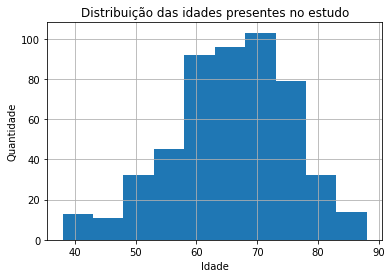

In [17]:
# Histograma das idades
new_meta['Diagnosis Age'].hist()
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribuição das idades presentes no estudo')
plt.show()

A análise do gráfico permite concluir que a maior concentração de idades deste estudo se verifica entre os 60 e os 80 anos sendo que existem alguns indivíduos fora deste intervalo sendo que o valor mínimo se encontra perto de 40 e o valor máximo perto de 90. 

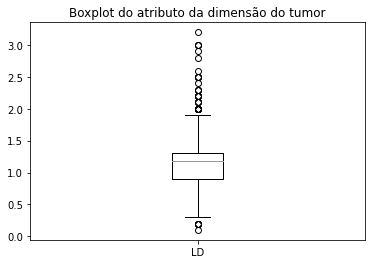

In [18]:
# Boxplot com os dados da maior dimensão do tumor
a = new_meta.iloc[:,2]
plt.boxplot(a)
plt.title('Boxplot do atributo da dimensão do tumor')
plt.xticks([1], ["LD"])
plt.show()


Relativamente ao gráfico apresentado, verifica-se a existência de 13 outliers relativamente à dimensão do tumor sendo que 11 deles se encontram com dimensão superior e 2 com dimensão inferior. No entanto, é possível concluir que apesar dos ourtliers, existe uma homogeneidade de tamanhos. 

Text(0.5, 1.0, 'Percentagem dos géneros')

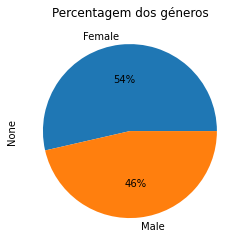

In [19]:
# Percentagens de homens e mulheres presentes no estudo
new_meta.groupby("Sex").size().plot.pie(autopct='%.0f%%')
plt.title('Percentagem dos géneros')

Através do gráfico apresentado verifica-se que a maior parte dos indivíduos do estudo são do sexo feminino, ocupando 54% do dataset, sendo que os restantes são do sexo masculino.

Text(0.5, 1.0, 'Percentagem de sobrevivência')

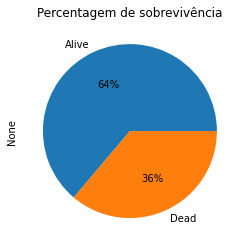

In [20]:
# Percentagens de indivíduos vivos e de mortos
new_meta.groupby("Patient's Vital Status").size().plot.pie(autopct='%.0f%%')
plt.title('Percentagem de sobrevivência')

O gráfico apresentado permite verificar que a grande maioria dos dados do estudo representam indivíduos vivos, sendo que apenas em 35% do dataset se verificou a morte dos mesmos.

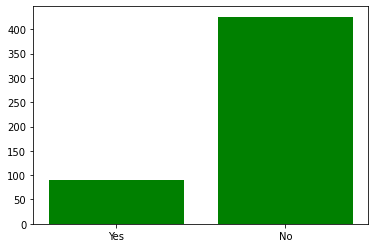

In [21]:
ind = [1,2]
counters = meta_luad["Prior Cancer Diagnosis Occurence"].value_counts()
f_yes = counters['Yes'] + counters['Yes, History of Prior Malignancy'] + counters['Yes, History of Synchronous/Bilateral Malignancy']
f_no = counters['No']

height=[f_yes,f_no]

plt.bar(ind, height,color='g')
plt.xticks(ind, ('Yes', 'No'))
plt.show()

O gráfico apresentado permite concluir que a maioria do indivíduos inquiridos teve cancro apenas uma vez, verificando-se ainda que aproximadamente 100 pessoas já tinham historial de doença.

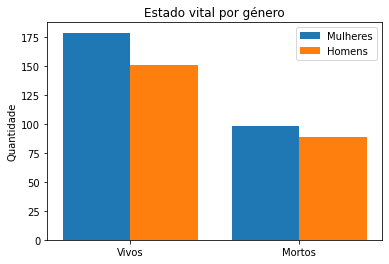

In [22]:
# Relacionar o estado vital com o género
import numpy as np

a = len(new_meta[(new_meta["Patient's Vital Status"]=='Alive') & (new_meta['Sex']=='Female')])
b = len(new_meta[(new_meta["Patient's Vital Status"]=='Alive') & (new_meta['Sex']=='Male')])
c = len(new_meta[(new_meta["Patient's Vital Status"]=='Dead') & (new_meta['Sex']=='Female')])
d = len(new_meta[(new_meta["Patient's Vital Status"]=='Dead') & (new_meta['Sex']=='Male')])

x = ['Vivos','Mortos']
y = [a,c]
z = [b,d]

x_axis = np.arange(len(x))

plt.bar(x_axis-0.2, y, 0.4, label = 'Mulheres')
plt.bar(x_axis+0.2, z, 0.4, label = 'Homens')
plt.xticks(x_axis,x)
plt.ylabel('Quantidade')
plt.title('Estado vital por género')
plt.legend()
plt.show()

Através do gráfico de barras apresentado, verificam-se dois tipos de divisões, através da idade e através do estado vital dos pacientes. Tal como concluído anteriormente, existem mais indivíduos vivos do que mortos e existem mais mulheres do que homens.

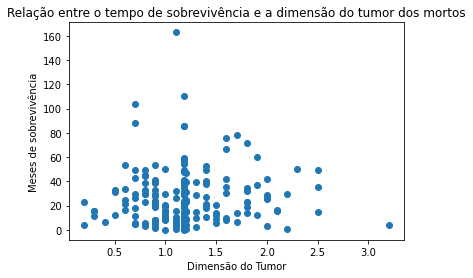

In [23]:
# Overall survival vs dimensão tumor apenas para os indíviduos que faleceram
from matplotlib import pyplot

x = new_meta[(new_meta["Patient's Vital Status"]=='Dead')]

OS = x['Overall Survival (Months)'].values
TD = x['Longest Dimension'].values

pyplot.scatter(TD,OS)
pyplot.xlabel('Dimensão do Tumor')
pyplot.ylabel('Meses de sobrevivência')
pyplot.title('Relação entre o tempo de sobrevivência e a dimensão do tumor dos mortos')
pyplot.show()

O gráfico de dispersão apresentado relaciona o tempo de sobrevivência, em meses, e a dimensão do tumor sendo que para este gráfico apenas se consideraram os indivíduos que faleceram. Assim, não se pode concluir nenhum tipo de relação entre os dois atributos em estudo, quando a dimensão do tumor toma valores reduzidos, tendo em conta que se verifica bastante dispersão entre os dados. No entanto, é de notar que quando a dimensão do tumor aumenta, a probabilidade de sobreviver durante mais tempo vai diminuindo.

# Comentário
O estudo referente ao dataset foi realizado a 230 pacientes que possuem diferentes tipos de adenocarcenoma dos pulmões. O estude teve duração de 19 meses e 81% dos pacientes relataram ser fumadores até ao momento. 
O objetivo deste estudo é relacionar a mutação dos genes dos pacientes com o seu diagnóstico.
Estes dados estabelecem uma base para a classificação e investigações adicionais da patogênese molecular do adenocarcinoma pulmonar.

Nos dados é feito um estudo de 20531 genes para cada uma das amostras biológicas recolhidas (518). 
Os atributos são numéricos e dizem respeito a número de cópias de genes expressas em mRNA.
O dataset dos metadados possui 517 linhas por 107 colunas, com atributos numéricos e nominais.

No pré-processamento dos dados, foi estudada a existência de valores nulos e verificou-se a existência de dois.
Tendo em conta que eram ambos referentes à mesma amostra, removeu-se essa linha do estudo reduzindo-o a 517, correspondentes aos que se encontravam nos metadados.

No pré-processamento dos metadados, verificou-se que existiam muitos mais valores nulos, nomeadamente, colunas inteiras sem valores atribuídos.
Nos atributos considerados relevantes e com poucos valores nulos, subtituíram-se os mesmos pela média da coluna.
Levando em consideração o objetivo do presente estudo, foram escolhidas apenas 7 atributos considerados de maior interesse, tais como, o ID da amostra que é a coluna chave
que relaciona os dados com os metadados (atributo nominal), a idade (atributo numérico), a fração de genoma alterado (atributo numérico), a maior dimensão do tumor (atributo numérico), a quantidade de mutações (atributo numérico), a quantidade de meses sobrevividos até à data(atributo numérico), o sexo (atributo nominal binário) e o estado vital do paciente (atributo nominal binário).

De notar que todas estas informações são referentes à data da última recolha dos dados. 
Aquando da última recolha, encontravam-se com vida 163 dos 230 pacientes iniciais